## 添加必要库，定义路径

In [3]:
import os
import re
import csv
import matplotlib.pyplot as plt
import pandas as pd

# 定义数据目录
directories = [
    "../data/pimaview/",
    "../data/test/",
    "../data/pimaviewcsv/"
    ]

In [4]:
def get_spectra_vector(lines):
    """
    解析文件内容，获取波长和反射率。

    Args:
    lines (list) -- 文件内容，每一行是一个字符串，形式为"波长 反射率"。

    Returns:
    wavelength (list) -- 波长列表，每个元素是一个浮点数。
    reflectivity (list) -- 反射率列表，每个元素是一个浮点数。
    """
    wavelength = []
    reflectivity = []
    for line in lines:
        if line.startswith("#") or line.strip() == "":
            continue
        parts = re.split(r"\s+", line)
        parts = [part for part in parts if part]  # 删除空字符串
        w=float(parts[0].strip())
        r=float(parts[1].strip())
        wavelength.append(w)
        reflectivity.append(r)
    return wavelength, reflectivity


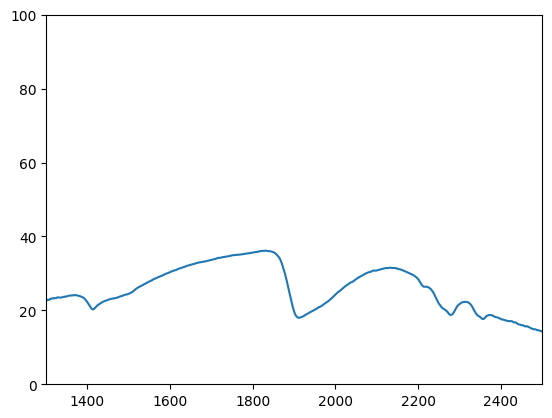

In [5]:
def showOneSpectra(dir,filename):
    """
    显示单个光谱
    :param dir: 目录
    :param filename: 文件名 
    :return: None
    """
    # 拼接文件路径
    filepath=os.path.join(dir,filename)
    # 读取文件中的数据
    with open(filepath, "r") as file:
        lines = file.readlines()
    # 从文件名截取矿物名称
    mine_name = filename.split(".")[0]
    # 解析数据，获取波长和反射率
    wavelength, reflectivity = get_spectra_vector(lines)

    # 绘制数据
    plt.plot(wavelength, reflectivity,label=mine_name)
    # plt.legend()    # 添加图例
    # 设置坐标轴范围并显示图表
    plt.xlim([1300, 2500])
    plt.ylim([0, 100])
    plt.show()

showOneSpectra(directories[0],"AZURITE.txt")

In [ ]:
def showAllSpectra(dir):
    """
    在同一图表中显示一个目录下的所有光谱。
    @param dir: 数据目录
    @return: None
    """
    # 获取目录下的所有文件
    files = os.listdir(dir)
    # 对每个文件执行操作
    for filename in files:
        # 忽略非.txt文件
        if not filename.endswith(".txt"):
            continue
        with open(os.path.join(dir, filename), "r", encoding="utf-8") as filepath:
            lines = filepath.readlines()
        mine_name=filename.split(".")[0]
        mine_names =[]
        mine_names.append(mine_name)
        # 解析数据
        wavelength, reflectivity = get_spectra_vector(lines)
        # 绘制数据
        plt.plot(wavelength, reflectivity,label=mine_names[0])
    
    # 添加图例
    # plt.legend()
    # 设置坐标轴范围并显示图表
    plt.xlim([1300, 2500])
    plt.ylim([0, 100])
    # 显示图表
    plt.show()

showAllSpectra(directories[0])